In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import ascii, fits

df = pd.read_csv('L1495_C18O_75_raw_processed_comb.dat', delimiter='\s+')
df.head(5)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Janek\AppData\Local\Temp\ipykernel_9972\4152871151.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('L1495_C18O_75_raw_processed_comb.dat', delimiter='\s+')


,ra,dec,W(C18O),AV,AV_sig,AV_n,N(C18O),N(H2),X(C18O),ra_2,dec_2,W(13CO),AV_2,AV_sig_2,AV_n_2,N(13CO),N(H2)_2,X(13CO)
0,64.152252,27.715528,-0.098954,1.120753,1.523746,20.0,-9.810309e+13,1.053508e+21,-9.312042e-08,64.154603,27.713444,2.0439,1.157326,1.525240,18.0,2.026322e+15,1.087886e+21,0.000002
1,64.152252,27.725944,-0.194590,1.032003,1.512752,19.0,-1.929165e+14,9.700825e+20,-1.988661e-07,64.154603,27.730111,2.4861,0.972764,1.507670,16.0,2.464720e+15,9.143981e+20,0.000003
2,64.152252,27.736361,-0.220780,0.917129,1.498738,19.0,-2.188813e+14,8.621017e+20,-2.538927e-07,64.154603,27.738444,2.9253,0.864260,1.489732,18.0,2.900142e+15,8.124047e+20,0.000004
3,64.152252,27.746778,-0.025434,0.934342,1.485701,19.0,-2.521547e+13,8.782815e+20,-2.871000e-08,64.154603,27.746778,3.0815,0.858284,1.480531,18.0,3.054999e+15,8.067874e+20,0.000004
4,64.152252,27.757194,-0.205760,1.065620,1.485235,19.0,-2.039905e+14,1.001683e+21,-2.036477e-07,64.154603,27.755111,2.9079,0.942692,1.477544,18.0,2.882892e+15,8.861300e+20,0.000003


In [3]:
T_NH2 = pd.read_csv('av_c18o_n2hp_75.dat', delimiter='\s+')
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Janek\AppData\Local\Temp\ipykernel_9972\92868125.py:1: SyntaxWarning: invalid escape sequence '\s'
  T_NH2 = pd.read_csv('av_c18o_n2hp_75.dat', delimiter='\s+')


,ra,dec,W(C18O),AV,AV_sig,AV_n,N(C18O),N(H2),X(C18O),ra_2,dec_2,W(13CO),AV_2,AV_sig_2,AV_n_2,N(13CO),N(H2)_2,X(13CO)
0,64.152252,27.715528,-0.098954,1.120753,1.523746,20.0,-9.810309e+13,1.053508e+21,-9.312042e-08,64.154603,27.713444,2.0439,1.157326,1.525240,18.0,2.026322e+15,1.087886e+21,0.000002
1,64.152252,27.725944,-0.194590,1.032003,1.512752,19.0,-1.929165e+14,9.700825e+20,-1.988661e-07,64.154603,27.730111,2.4861,0.972764,1.507670,16.0,2.464720e+15,9.143981e+20,0.000003
2,64.152252,27.736361,-0.220780,0.917129,1.498738,19.0,-2.188813e+14,8.621017e+20,-2.538927e-07,64.154603,27.738444,2.9253,0.864260,1.489732,18.0,2.900142e+15,8.124047e+20,0.000004
3,64.152252,27.746778,-0.025434,0.934342,1.485701,19.0,-2.521547e+13,8.782815e+20,-2.871000e-08,64.154603,27.746778,3.0815,0.858284,1.480531,18.0,3.054999e+15,8.067874e+20,0.000004
4,64.152252,27.757194,-0.205760,1.065620,1.485235,19.0,-2.039905e+14,1.001683e+21,-2.036477e-07,64.154603,27.755111,2.9079,0.942692,1.477544,18.0,2.882892e+15,8.861300e+20,0.000003


<Figure size 1000x600 with 0 Axes>

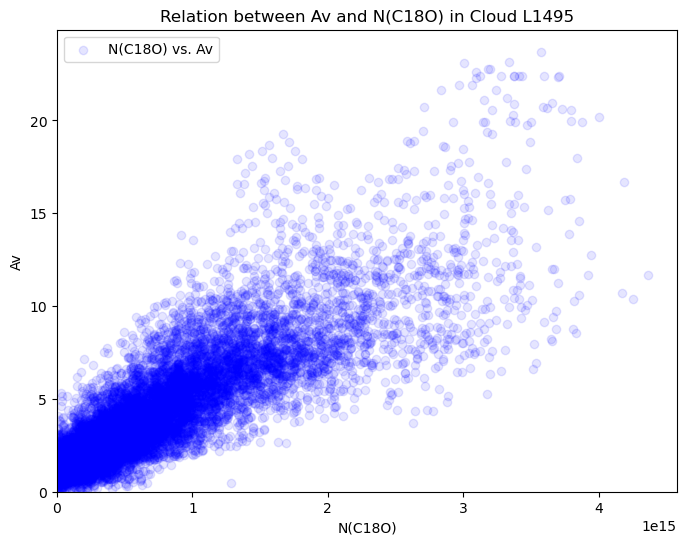

In [4]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['AV'] >= 0) & (df['N(C18O)'] >= 0)].dropna(subset=['AV', 'N(C18O)'])

pv_AV = filtered_df['AV']
pv_C18O = filtered_df['N(C18O)']

plt.figure(figsize=(8, 6))
plt.scatter(pv_C18O, pv_AV, color='b', alpha=0.1, label='N(C18O) vs. Av')
plt.xlabel("N(C18O)") 
plt.ylabel("Av")
plt.xlim(left=0)      
plt.ylim(bottom=0)   
plt.title("Relation between Av and N(C18O) in Cloud L1495")
plt.legend()
plt.grid(False)
plt.show()


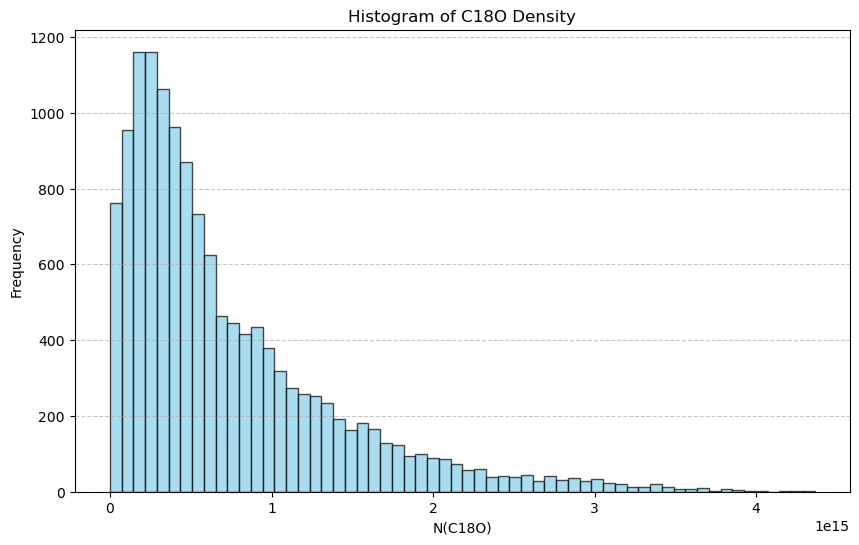

In [5]:
plt.figure(figsize=(10, 6))
pv_C18O = df['N(C18O)'][df['N(C18O)'] >= 0]
plt.hist(pv_C18O, bins=60, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram of C18O Density')
plt.xlabel('N(C18O)')
density=False
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [32]:
from scipy.stats import norm
C18O_min = pv_C18O.min()
C18O_max = pv_C18O.max()
C18O_mean =pv_C18O.mean()
C18O_var = pv_C18O.var()
std_dev_C18O = np.sqrt(C18O_var)
print(f'Min of N(C18O) Distribution: {C18O_min:.2e}')
print(f'Max of N(C18O) Distribution: {C18O_max:.2e}')
print(f'Mean of N(C18O) Distribution: {C18O_mean:.2e}')
print(f'Variance of N(C18O) Distribution: {C18O_var:.2e}')
print(f'Standard Deviation of N(C18O) Distribution: {std_dev_C18O:.2e}')

Min of N(C18O) Distribution: 2.00e+10
Max of N(C18O) Distribution: 4.36e+15
Mean of N(C18O) Distribution: 7.28e+14
Variance of N(C18O) Distribution: 4.47e+29
Standard Deviation of N(C18O) Distribution: 6.69e+14


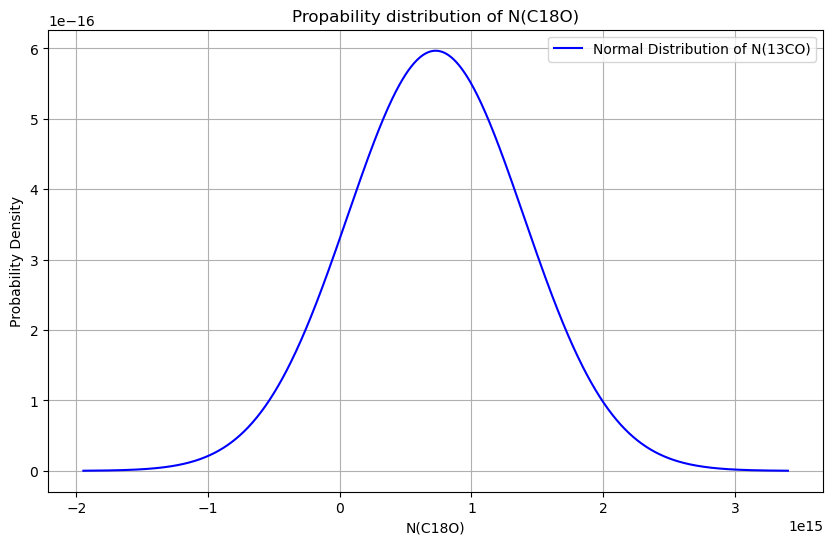

In [39]:
x_values = np.linspace(C18O_mean - 4*std_dev_C18O, C18O_mean + 4*std_dev_C18O, 1000)

# Berechne die Normalverteilung basierend auf mean und std_dev
pdf_values = norm.pdf(x_values, C18O_mean, std_dev_C18O)

# Plot der Wahrscheinlichkeitsverteilung
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color='blue', label='Normal Distribution of N(13CO)')
plt.xlabel("N(C18O)")
plt.ylabel("Probability Density")
plt.title("Propability distribution of N(C18O)")
plt.legend()
plt.grid(True)
plt.show()

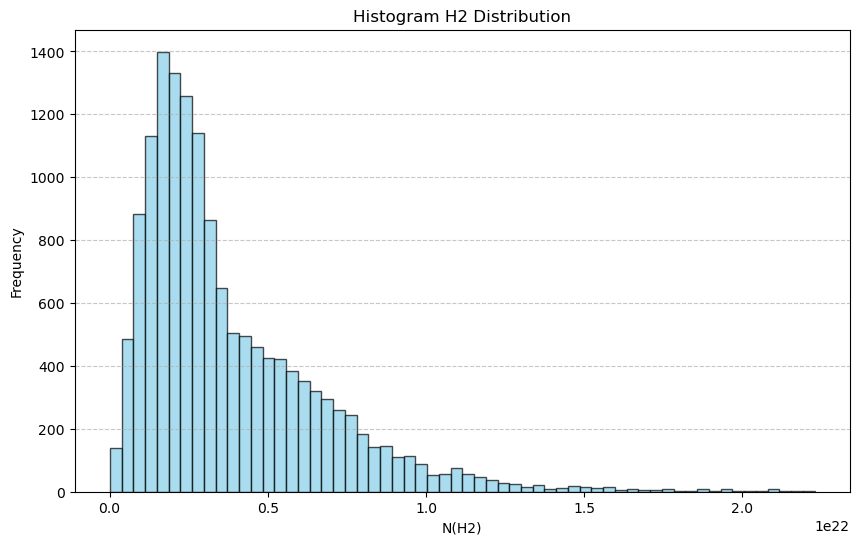

In [7]:
plt.figure(figsize=(10, 6))
pv_H2 = df['N(H2)'][df['N(H2)'] >= 0]
plt.hist(pv_H2, bins=60, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram H2 Distribution')
plt.xlabel('N(H2)')
density=False
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

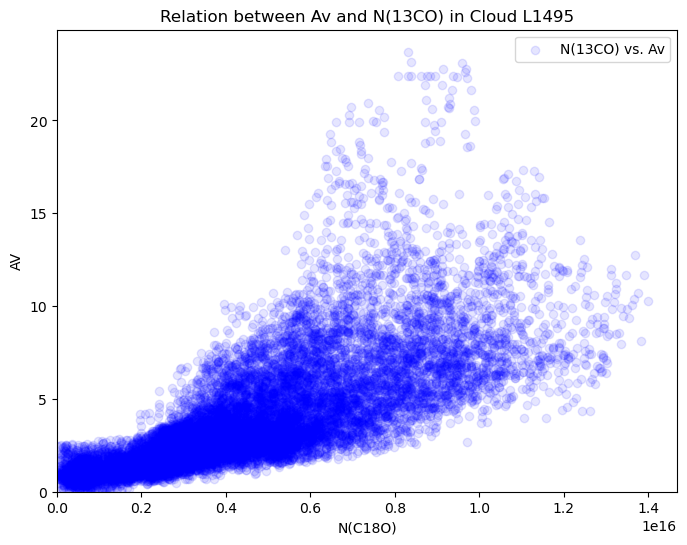

In [23]:
plt.figure(figsize=(8, 6))
filtered_df = df[(df['AV'] >= 0) & (df['N(13CO)'] >= 0)].dropna(subset=['AV', 'N(C18O)'])
pv_13CO = filtered_df['N(13CO)']
pv_AV = filtered_df['AV']
plt.scatter(pv_13CO, pv_AV, color='b', alpha=0.1, label='N(13CO) vs. Av')
plt.xlabel("N(C18O)")
plt.ylabel("AV")
plt.title("Relation between Av and N(13CO) in Cloud L1495")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.grid(False)
plt.show()

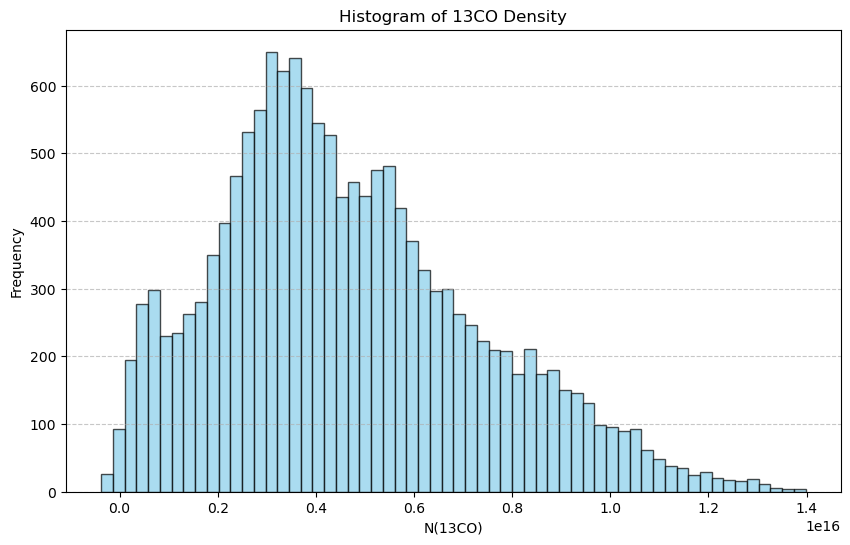

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['N(13CO)'], bins=60, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram of 13CO Density')
plt.xlabel('N(13CO)')
density=False
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Mean of N(13CO): 4.65e+15
Max of N(13CO): 1.40e+16
Min of N(13CO): -3.77e+14
Varience of N(13CO): 7.04e+30


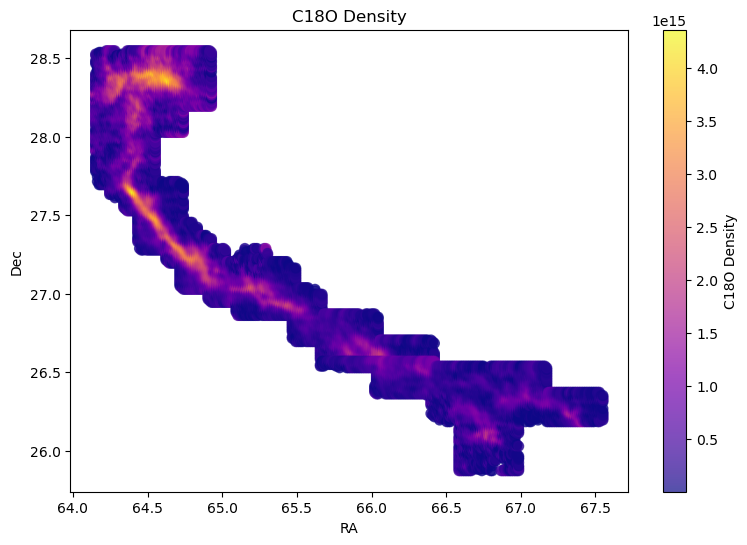

In [42]:
plt.figure(figsize=(9, 6))
df_pv_C18O = df[df["N(C18O)"] > 0]
sc = plt.scatter(df_pv_C18O["ra"], df_pv_C18O["dec"], c=pv_C18O, cmap='plasma', s=50, alpha=0.7)

plt.colorbar(sc, label="C18O Density")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("C18O Density")
plt.grid(False)
plt.show()

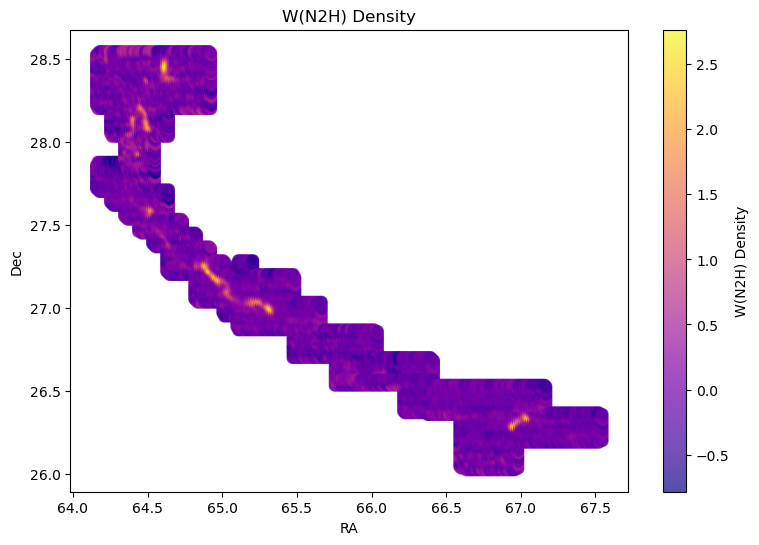

In [12]:
plt.figure(figsize=(9, 6))
sc = plt.scatter(T_NH2["ra"], T_NH2["dec"], c=T_NH2["W(N2H)"], cmap='plasma', s=50, alpha=0.7)

plt.colorbar(sc, label="W(N2H) Density")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("W(N2H) Density")
plt.grid(False)
plt.show()

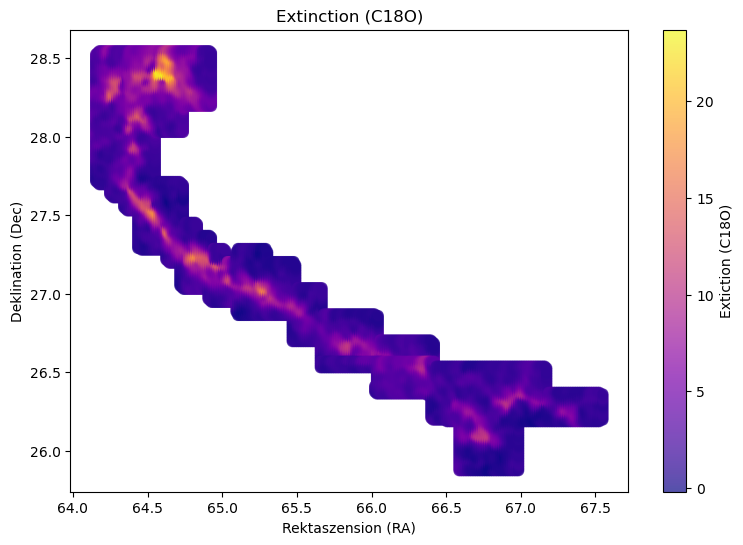

In [13]:
plt.figure(figsize=(9, 6))
sc = plt.scatter(df["ra"], df["dec"], c=df["AV"], cmap='plasma', s=50, alpha=0.7)

plt.colorbar(sc, label="Extiction (C18O)")
plt.xlabel("Rektaszension (RA)")
plt.ylabel("Deklination (Dec)")
plt.title("Extinction (C18O)")
plt.grid(False)
plt.show()

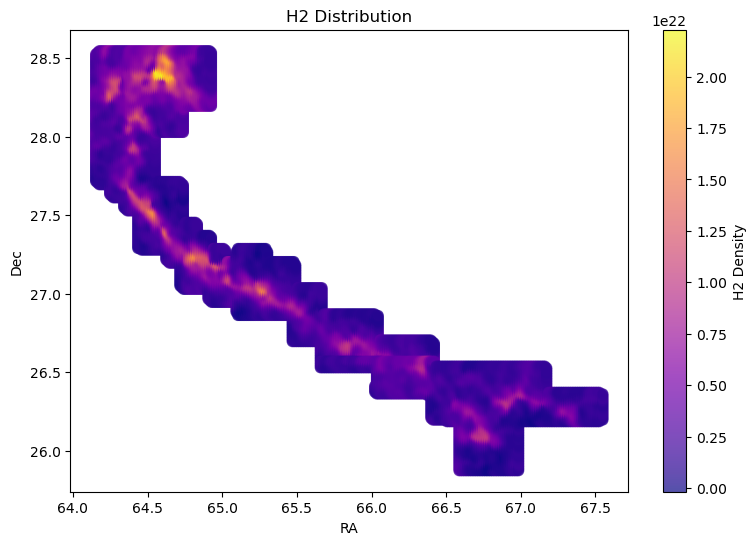

In [14]:
plt.figure(figsize=(9, 6))

# Scatterplot mit Farbkodierung basierend auf der C18O-Dichte
sc = plt.scatter(df["ra"], df["dec"], c=df["N(H2)"], cmap='plasma', s=50, alpha=0.7)

# Farbbalken hinzufügen, um die Dichte-Skala anzuzeigen
plt.colorbar(sc, label="H2 Density")

plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("H2 Distribution")
plt.grid(False)
plt.show()

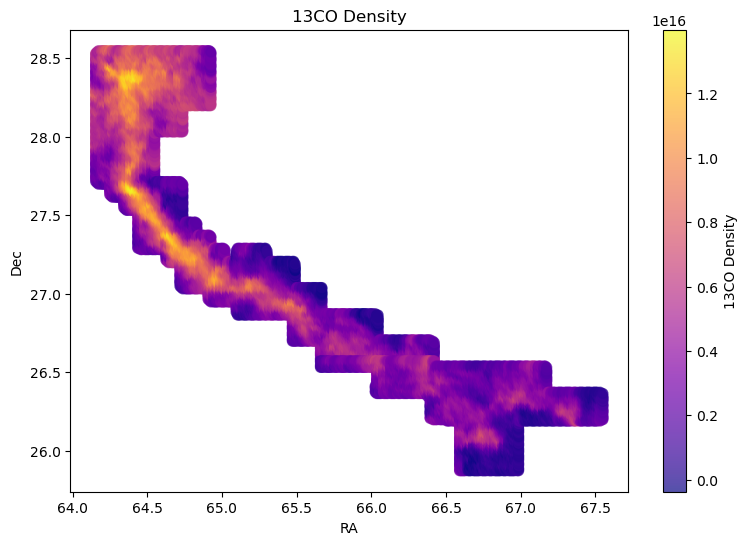

In [15]:
plt.figure(figsize=(9, 6))
sc = plt.scatter(df["ra_2"], df["dec_2"], c=df["N(13CO)"], cmap='plasma', s=50, alpha=0.7)


plt.colorbar(sc, label="13CO Density")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("13CO Density")
plt.grid(False)
plt.show()

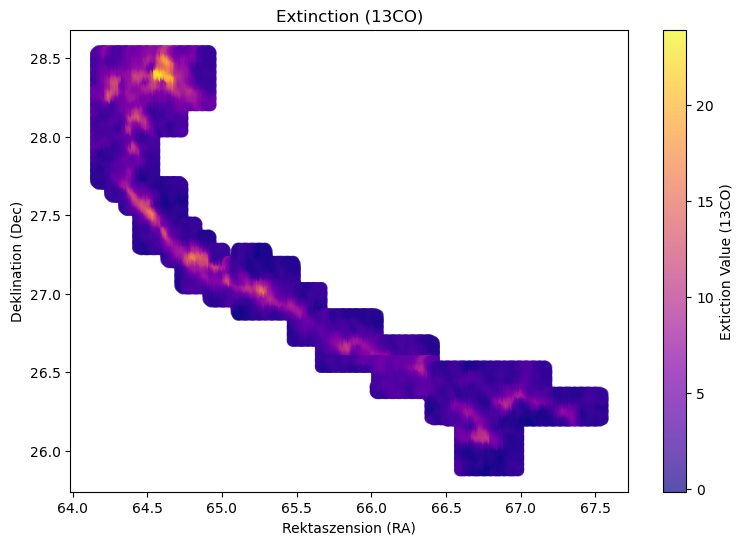

In [16]:
plt.figure(figsize=(9, 6))
sc = plt.scatter(df["ra_2"], df["dec_2"], c=df["AV_2"], cmap='plasma', s=50, alpha=0.7)

plt.colorbar(sc, label="Extiction Value (13CO)")
plt.xlabel("Rektaszension (RA)")
plt.ylabel("Deklination (Dec)")
plt.title("Extinction (13CO)")
plt.grid(False)
plt.show()

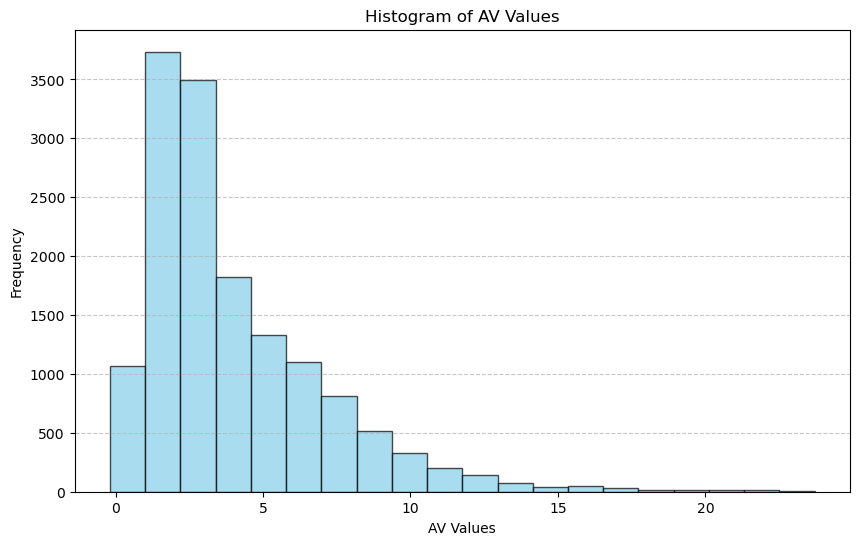

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['AV'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 3: Customize the plot
plt.title('Histogram of AV Values')
plt.xlabel('AV Values')
density=False
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [18]:
print(df['AV'].mean())


4.026738303201715


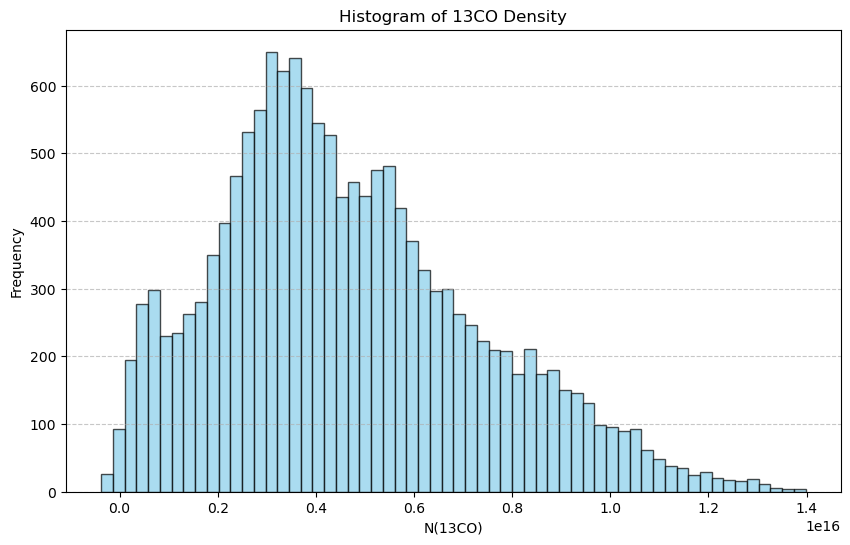

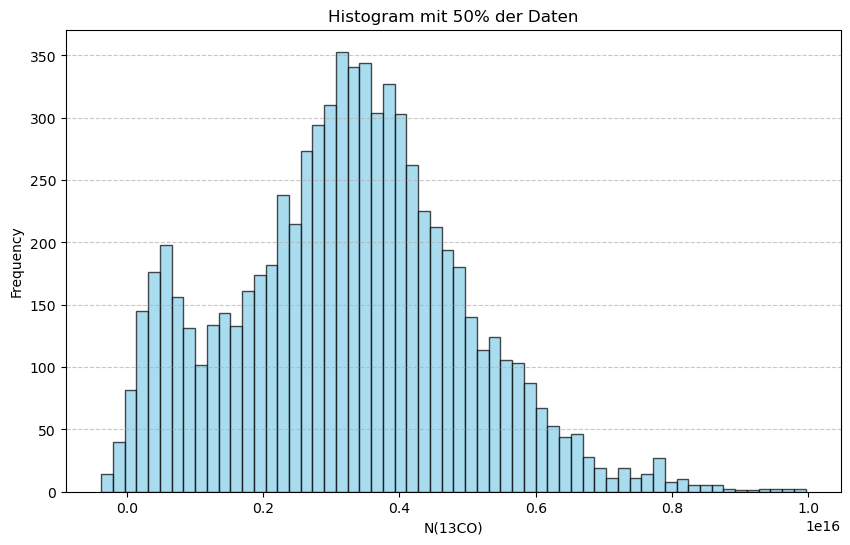

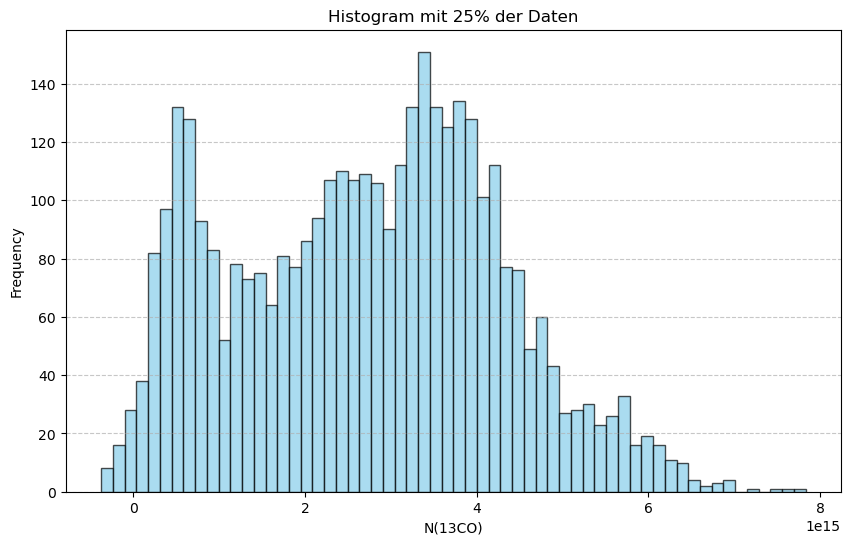

In [19]:
# Histogramm mit allen Daten
plt.figure(figsize=(10, 6)) 
plt.hist(df['N(13CO)'], bins=60, color='skyblue', edgecolor='black', alpha=0.7, density=False)

plt.title('Histogram of 13CO Density')
plt.xlabel('N(13CO)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogramm mit 50% der Daten
half_dataset = df['N(13CO)'].iloc[int(len(df) * 0.5):]

plt.figure(figsize=(10, 6))
plt.hist(half_dataset, bins=60, color='skyblue', edgecolor='black', alpha=0.7, density=False)

plt.title('Histogram mit 50% der Daten')
plt.xlabel('N(13CO)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogramm mit 25% der Daten
last_quarters = df['N(13CO)'].iloc[int(len(df) * 0.75):]  # Name korrigiert

plt.figure(figsize=(10, 6))
plt.hist(last_quarters, bins=60, color='skyblue', edgecolor='black', alpha=0.7, density=False)

plt.title('Histogram mit 25% der Daten')
plt.xlabel('N(13CO)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
